# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness);
- [данные по фильмам и сериалам Netflix](https://www.kaggle.com/shivamb/netflix-shows).

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib inline



import os

Датасет данные Аirbnb в городе New-York/ Каждая строка - определенное жилье, расположенное а определенном районе, имеющее тип, цена, минимальное количество ночей, которое можно забронировать и т.п.

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
# удалим данные колонки
data.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)

поскольку  колонка 'reviews_per_month' не заполнена по причине того, что у жилья может не быть отзывов в принципе (а эта колонка обозначает количество отзывов за последний месяц), то правомерно заполнить ее нулями

In [6]:
data.fillna({'reviews_per_month':0}, inplace=True)

In [7]:
# какие административные округи  есть в рассматриваемых данных
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [8]:
# типы жилья
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Попробуем с помощью Scatter отобразить карту с расположением жилья по административным округам

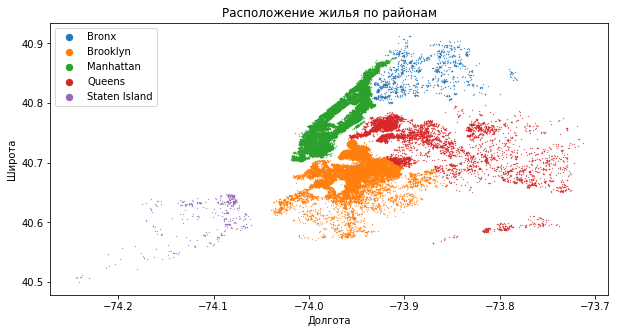

In [9]:
plt.figure(figsize=(10, 5))
for name, group in data.groupby(['neighbourhood_group']):
    plt.scatter(group['longitude'], group['latitude'],s=0.1, label=name)
plt.xlabel('Долгота')
plt.ylabel('Широта')    
plt.legend(markerscale=20)
plt.title('Расположение жилья по районам')
plt.show()

Видим, что большая часть предлагаемого жилья располагается в Бруклине и на Манхеттене

Попробуем разобраться, как соотносятся между собой разные типы жилья

In [10]:
room_type_size = data.groupby('room_type').size()
room_type_size

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
dtype: int64

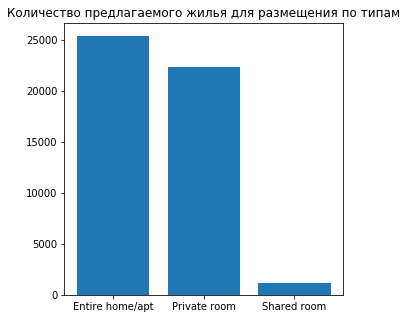

In [11]:
plt.figure(figsize=(5, 5))
plt.bar(room_type_size.index, room_type_size.values)
plt.title('Количество предлагаемого жилья для размещения по типам')
plt.show()

Видим что в большинстве случаев сдается дом целиком

**Посмотрим на соотношениие количества предлагаемого жилья по районам**

In [12]:
room_type_by_ng = data.groupby(['neighbourhood_group', 'room_type']).host_id.count().reset_index()
room_type_by_ng

,neighbourhood_group,room_type,host_id
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


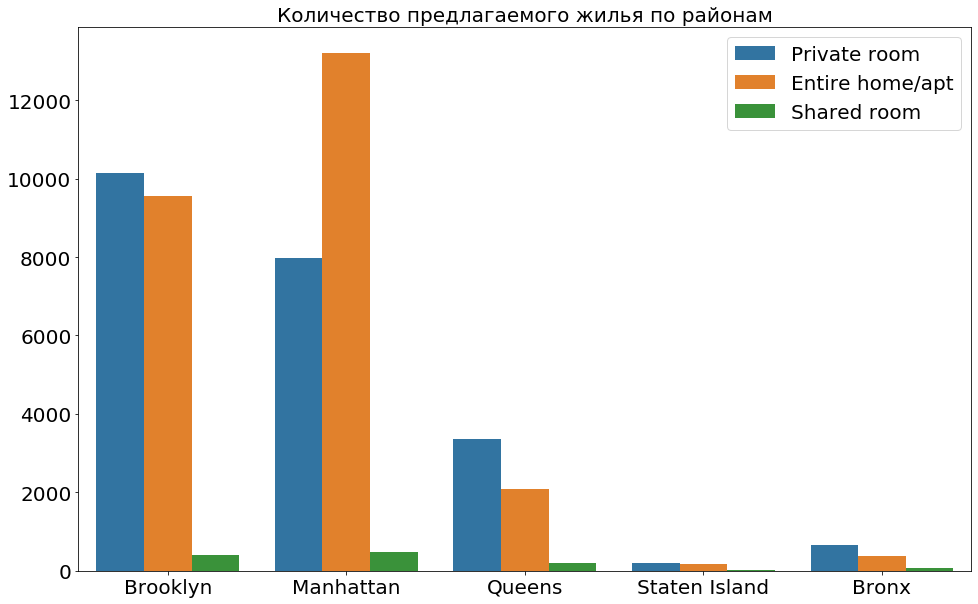

In [13]:
plt.figure(figsize=(16,10))
plt.title("Количество предлагаемого жилья по районам", fontsize=20)
plt.tick_params(labelsize=20)

sns.barplot(y='host_id', x="neighbourhood_group", hue='room_type', order=list(data.neighbourhood_group.unique()),\
            hue_order=list(data.room_type.unique()),\
            data=room_type_by_ng).set(ylabel=None, xlabel=None)
plt.legend(loc=1, fontsize=20)
plt.show()

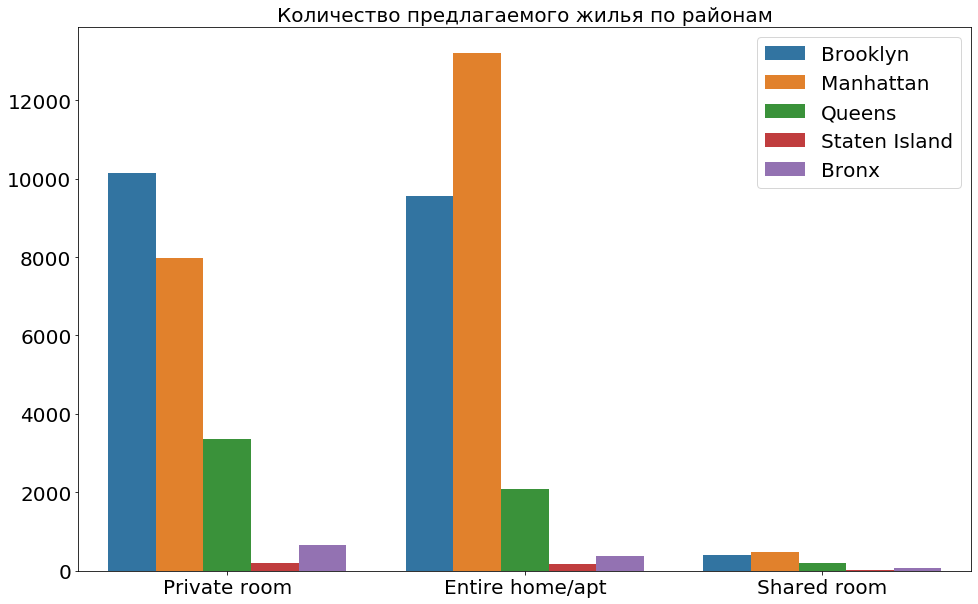

In [14]:
plt.figure(figsize=(16,10))
plt.title("Количество предлагаемого жилья по районам", fontsize=20)
plt.tick_params(labelsize=20)

sns.barplot(y='host_id', x= 'room_type', hue="neighbourhood_group", order=list(data.room_type.unique()),\
            hue_order=list(data.neighbourhood_group.unique()),\
            data=room_type_by_ng).set(ylabel=None, xlabel=None)
plt.legend(loc=1, fontsize=20)
plt.show()

Как видим в Бруклине количество сдаваемых домов и квартир примерно одинаковое, тогда как в Манхеттене больше сдается домов

посмотрим на распредениение цены на жилье в зависимости от района

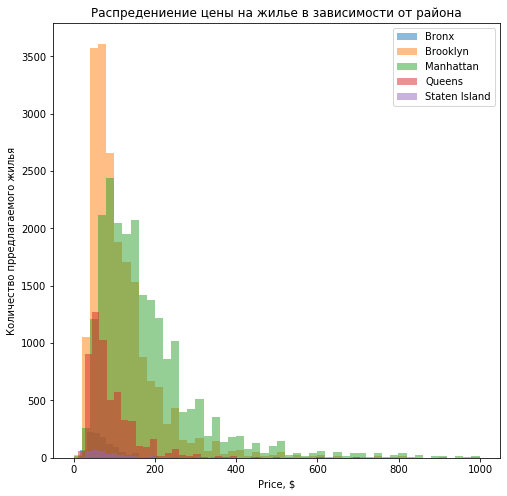

In [15]:
plt.figure(figsize=(8, 8))
filtered_data = data[data['price'] < 1000]
for name, group in filtered_data.groupby(['neighbourhood_group']):
    plt.hist(group['price'], label=name, bins=50, alpha=0.5)
plt.xlabel('Price, $')
plt.ylabel('Количество прредлагаемого жилья')
plt.title('Распредениение цены на жилье в зависимости от района')
plt.legend()
plt.show()

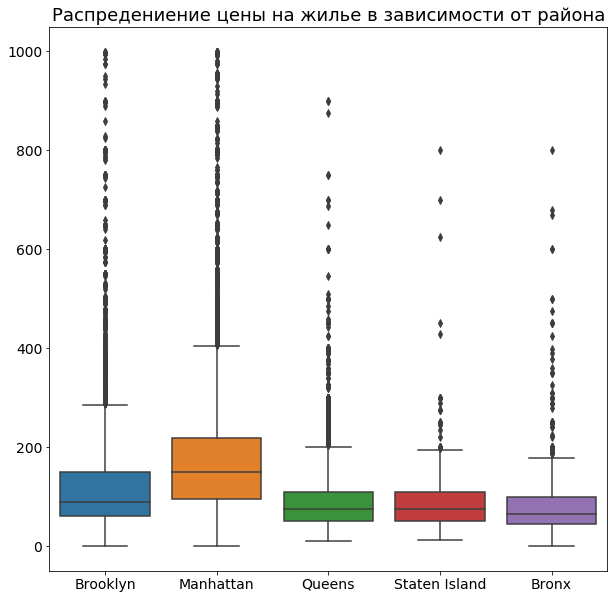

In [16]:
plt.figure(figsize=(10,10))
plt.title("Распредениение цены на жилье в зависимости от района", fontsize=18)
plt.tick_params(labelsize=14)

sns.boxplot(x='neighbourhood_group', y="price", data=filtered_data).set(ylabel=None, xlabel=None)
plt.show()

Видим, что большее количество жилья сдается в Бруклине и на Манхеттене и явно видна разница в стоимости жилья в этих районах,в Бруклине большее количество более дешевого жилья, чем например на Манхеттене

Можем также посмотреть на зависимость стоимости от типа сдаваемого жилья

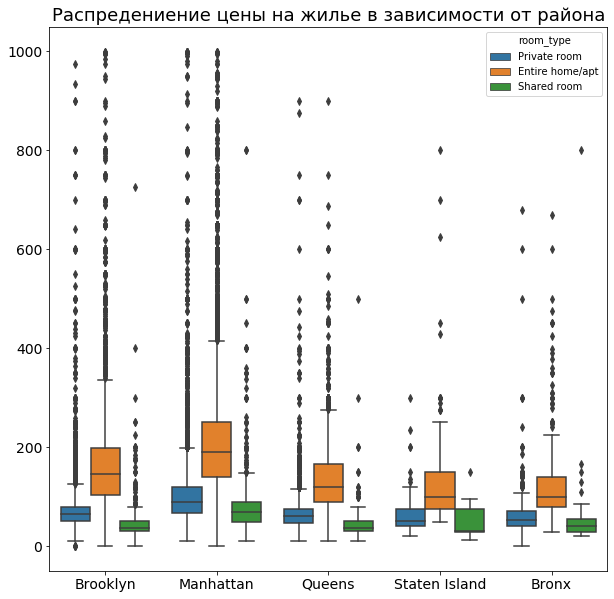

In [17]:
plt.figure(figsize=(10,10))
plt.title("Распредениение цены на жилье в зависимости от района", fontsize=18)
plt.tick_params(labelsize=14)
sns.boxplot(x='neighbourhood_group', y="price", hue='room_type', order=list(data.neighbourhood_group.unique()),\
            hue_order=list(data.room_type.unique()),\
            data=filtered_data).set(ylabel=None, xlabel=None)
plt.show()

Что закономерно: стоимость дома гораздо выше стоимости квартиры , но также видим, что в неблагополучном Бронксе цены на дома сравнимы с ценами на квартиры в Манхеттене

**Посмотрим на долю сдаваемого жилья в каждом районе**

In [18]:
neighbourhood_group_size = data.groupby(['neighbourhood_group']).size()

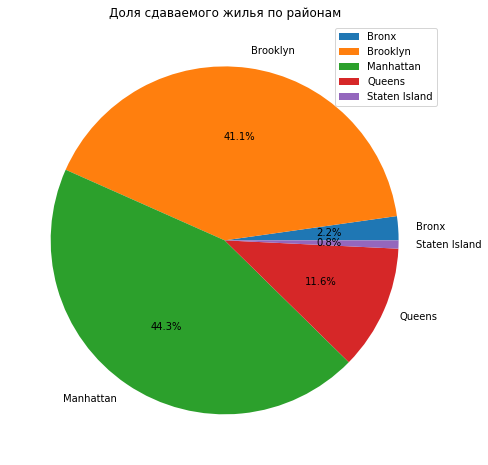

In [19]:
plt.figure(figsize=(8, 8))
plt.pie(neighbourhood_group_size.values, labels=neighbourhood_group_size.index, autopct='%1.1f%%')
plt.legend()
plt.title('Доля сдаваемого жилья по районам')
plt.show()

Еще раз убедились в том что большая часть жилья сдается на Манхеттене и в Бруклине, и их доли примерно одинаковы

**Посмотрим на корреляцию величин в датасете**

In [20]:
corr_m = data[['price', 'minimum_nights','number_of_reviews','reviews_per_month','availability_365']].corr()
corr_m

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
price,1.000000,0.042799,-0.047954,-0.050564,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.124905,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.589407,0.172028
reviews_per_month,-0.050564,-0.124905,0.589407,1.000000,0.163732
availability_365,0.081829,0.144303,0.172028,0.163732,1.000000


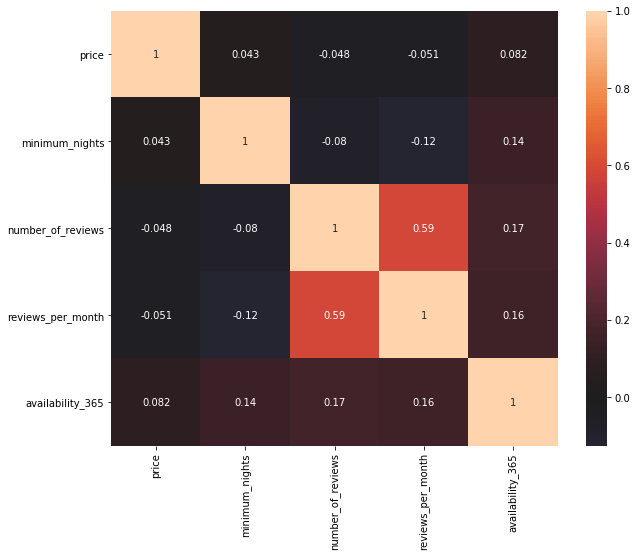

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_m, center=0, annot=True)
plt.show()

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.